In [76]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
#import os
#from path import Path

In [63]:
#Read in the file
#file_path = Path('Data/Data_Combined_for_ipynb.xlsx')
weather_data_df = pd.read_excel('Data/Data_Combined_for_ipynb.xlsx')                 
weather_data_df.head()                   

,year,city,country,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp
0,1743,Ljubljana,Slovenia,5.49,1.55,NaN,NaN,NaN
1,1744,Ljubljana,Slovenia,11.06,6.32,NaN,NaN,NaN
2,1745,Ljubljana,Slovenia,2.30,-5.95,NaN,NaN,NaN
3,1746,Ljubljana,Slovenia,NaN,0.00,NaN,NaN,NaN
4,1747,Ljubljana,Slovenia,NaN,0.00,NaN,NaN,NaN


## Exploring Data

In [64]:
# Check the shape
weather_data_df.shape

(271, 8)

In [65]:
# Drop the uneccesary columns
weather_data_df = weather_data_df.drop(columns=['city','country'])

In [66]:
# Drop the null rows
weather_data_df = weather_data_df.dropna()

In [67]:
# Check the shape
weather_data_df.shape

(165, 6)

In [68]:
# Check the weather data.
df = weather_data_df 
df.head() 

,year,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp
106,1849,9.07,3.30,21.03,14.12,7.98
107,1850,8.64,3.57,21.21,13.80,7.90
108,1851,8.72,4.48,21.33,14.39,8.18
109,1852,9.50,3.29,21.28,13.81,8.10
110,1853,8.99,4.25,21.78,14.40,8.04


## Calculating Moving Average

In [69]:
# Calculate the moving average in Python (long version/good for understanding formula) - 5 year MA (slinding window)
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3_TEST'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [72]:
# Calculate the moving average with Pandas rolling window function
df['pandas_SMA_3_TEST'] = df.iloc[:,1].rolling(window=5).mean()

In [73]:
# Check data
df.head() 

,year,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp,SMA_3_TEST,pandas_SMA_3_TEST
106,1849,9.07,3.30,21.03,14.12,7.98,NaN,NaN
107,1850,8.64,3.57,21.21,13.80,7.90,NaN,NaN
108,1851,8.72,4.48,21.33,14.39,8.18,8.8,NaN
109,1852,9.50,3.29,21.28,13.81,8.10,9.0,NaN
110,1853,8.99,4.25,21.78,14.40,8.04,9.1,8.984


In [74]:
# Calculate moving averages for all cities and global data with a proper column name
df['LJ_MA_5y'] = df.iloc[:,1].rolling(window=5).mean()
df['LJ_MA_10y'] = df.iloc[:,1].rolling(window=10).mean()
df['HE_MA_5y'] = df.iloc[:,2].rolling(window=5).mean()
df['GU_MA_5y'] = df.iloc[:,3].rolling(window=5).mean()
df['SF_MA_5y'] = df.iloc[:,4].rolling(window=5).mean()
df['GLOBAL_MA_5y'] = df.iloc[:,5].rolling(window=5).mean()

In [75]:
# Check data
df.head(10) 

,year,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp,SMA_3_TEST,pandas_SMA_3_TEST,LJ_MA_5y,LJ_MA_10y,HE_MA_5y,GU_MA_5y,SF_MA_5y,GLOBAL_MA_5y
106,1849,9.07,3.30,21.03,14.12,7.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,1850,8.64,3.57,21.21,13.80,7.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,1851,8.72,4.48,21.33,14.39,8.18,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,1852,9.50,3.29,21.28,13.81,8.10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,1853,8.99,4.25,21.78,14.40,8.04,9.1,8.984,8.984,NaN,3.778,21.326,14.104,8.040
111,1854,8.98,4.62,21.64,13.98,8.21,9.2,8.966,8.966,NaN,4.042,21.448,14.076,8.086
112,1855,8.74,3.27,21.09,14.20,8.11,8.9,8.986,8.986,NaN,3.982,21.424,14.156,8.128
113,1856,9.12,2.36,20.60,14.10,8.00,8.9,9.066,9.066,NaN,3.558,21.278,14.098,8.092
114,1857,9.33,4.38,21.12,14.78,7.76,9.1,9.032,9.032,NaN,3.776,21.246,14.292,8.024
115,1858,8.48,5.04,21.05,14.19,8.10,9.0,8.930,8.930,8.957,3.934,21.100,14.250,8.036


## Creating Visuals

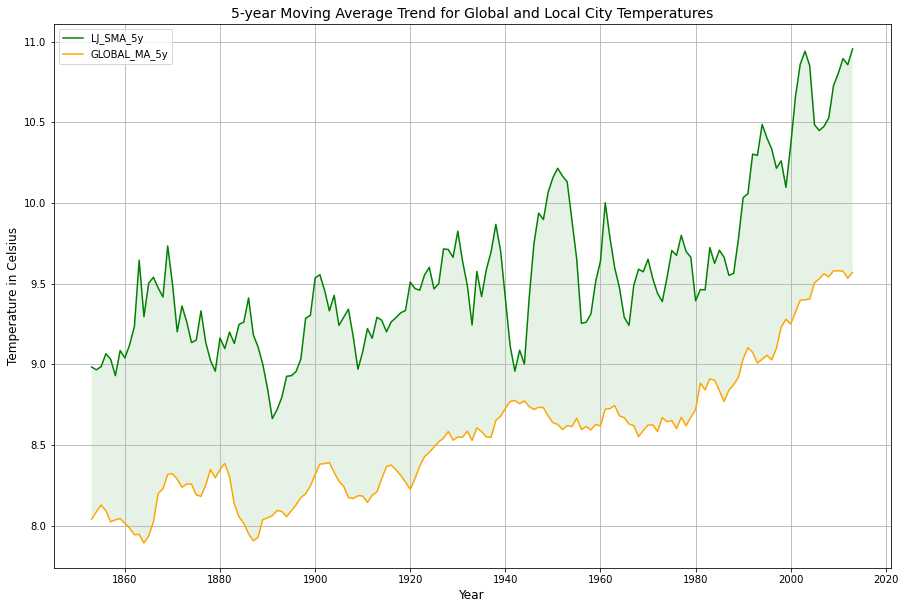

In [106]:
# Plot the averages - Ljubljana and Global: 5-year MA
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['year'], df['LJ_MA_5y'],label='LJ_SMA_5y', color='green')
plt.plot(df['year'], df['GLOBAL_MA_5y'],label='GLOBAL_MA_5y', color='orange')
plt.fill_between(df['year'], df['LJ_MA_5y'], df['GLOBAL_MA_5y'], facecolor='green', alpha=0.1 )
plt.legend(loc=2)

# Create labels for the x and y axes.
plt.xlabel("Year", size=12)
plt.ylabel("Temperature in Celsius", size=12)

# Create a title.
plt.title("5-year Moving Average Trend for Global and Local City Temperatures", size=14)

# Save the figure.
plt.savefig("Analysis/Aveg_Temp_5year_MA_2cities.png")

# Show the plot
plt.show()

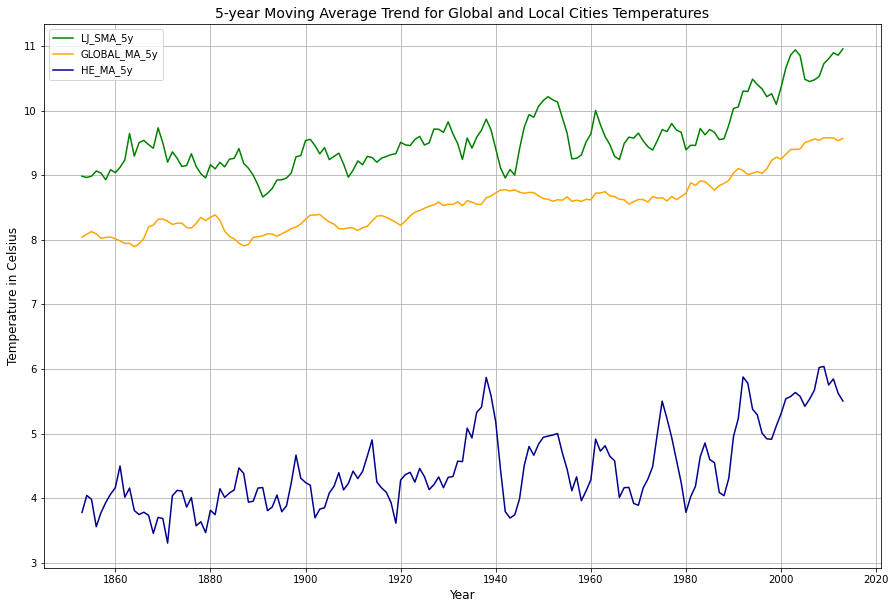

In [104]:
# Plot the averages - Ljubljana and Global: 5-year MA
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['year'], df['LJ_MA_5y'],label='LJ_SMA_5y', color='green')
plt.plot(df['year'], df['GLOBAL_MA_5y'],label='GLOBAL_MA_5y', color='orange')
plt.plot(df['year'], df['HE_MA_5y'],label='HE_MA_5y', color='darkblue')
plt.legend(loc=2)

# Create labels for the x and y axes.
plt.xlabel("Year", size=12)
plt.ylabel("Temperature in Celsius",  size=12)

# Create a title.
plt.title("5-year Moving Average Trend for Global and Local Cities Temperatures",  size=14)

# Save the figure.
plt.savefig("Analysis/Aveg_Temp_5year_MA_3cities.png")

# Show the plot
plt.show()


In [105]:
# Descriptive statistics
df_descriptive_stats = df.iloc[:,np.r_[1:3, 5]]
df_descriptive_stats.describe()

,LJ_avg_temp,HE_avg_temp,GLOBAL_avg_temp
count,165.000000,165.000000,165.000000
mean,9.577697,4.454848,8.554545
std,0.724313,1.096064,0.460165
min,8.000000,1.720000,7.560000
25%,9.020000,3.690000,8.190000
50%,9.510000,4.500000,8.530000
75%,10.060000,5.270000,8.770000
max,11.580000,6.770000,9.730000


## Exploring Data With Correlation Coeficient

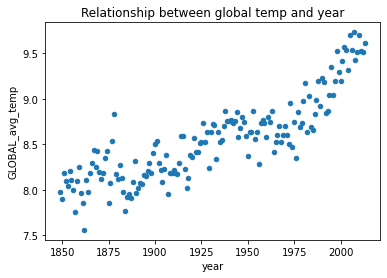

In [100]:
# Scatter Plot between global and year.
df.plot(x='year', y='GLOBAL_avg_temp', kind = 'scatter');

# Create a title.
plt.title("Relationship between global temp and year",  size=12)

# Save the figure.
plt.savefig("Analysis/ScatterPlot_global-year.png")

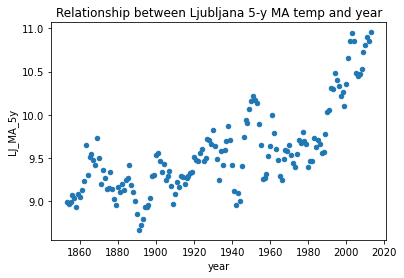

In [101]:
# Scatter Plot between city (Ljubljana) and year.
# Important observation: see full description here: https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404)
# Pearson coeficient is good for linear relationsip not for exponential.
df.plot(x='year', y='LJ_MA_5y', kind = 'scatter');

# Create a title.
plt.title("Relationship between Ljubljana 5-y MA temp and year",  size=12)

# Save the figure.
plt.savefig("Analysis/ScatterPlot_LJ-year.png")

In [92]:
# Create relevant df for calculating correlation coeficient.
coeficient_df = df.iloc[:,np.r_[:2, 5]]
coeficient_df

,year,LJ_avg_temp,GLOBAL_avg_temp
106,1849,9.07,7.98
107,1850,8.64,7.90
108,1851,8.72,8.18
109,1852,9.50,8.10
110,1853,8.99,8.04
...,...,...,...
266,2009,11.06,9.51
267,2010,10.00,9.70
268,2011,11.02,9.52
269,2012,11.12,9.51


In [93]:
# Calculating correlation coeficient between year, city(Ljubljana) and Global.
pearsoncorr_single = coeficient_df.corr(method='pearson')
pearsoncorr_single

,year,LJ_avg_temp,GLOBAL_avg_temp
year,1.000000,0.566389,0.863253
LJ_avg_temp,0.566389,1.000000,0.620927
GLOBAL_avg_temp,0.863253,0.620927,1.000000


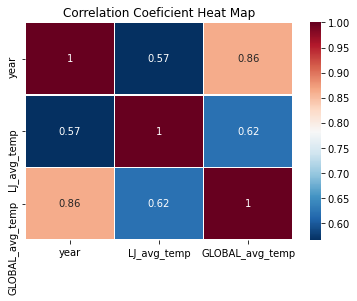

In [102]:
# Plotting correlation coeficient heat map.
sb.heatmap(pearsoncorr_single, 
            xticklabels=pearsoncorr_single.columns,
            yticklabels=pearsoncorr_single.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

# Create a title.
plt.title("Correlation Coeficient Heat Map",  size=12)

# Save the figure.
plt.savefig("Analysis/Coef_Heat_Map.png")

In [95]:
# (Example - not so relevant for this analyis)
# Calculate pearson coeficient for entire data set
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,year,LJ_avg_temp,HE_avg_temp,GU_avg_temp,SF_avg_temp,GLOBAL_avg_temp,SMA_3_TEST,pandas_SMA_3_TEST,LJ_MA_5y,LJ_MA_10y,HE_MA_5y,GU_MA_5y,SF_MA_5y,GLOBAL_MA_5y
year,1.000000,0.566389,0.422910,0.680285,0.467342,0.863253,0.691052,0.757661,0.757661,0.805942,0.706910,0.830573,0.633831,0.911539
LJ_avg_temp,0.566389,1.000000,0.585342,0.411130,0.353996,0.620927,0.788485,0.715510,0.715510,0.676151,0.578055,0.508144,0.411148,0.631598
HE_avg_temp,0.422910,0.585342,1.000000,0.277033,0.198210,0.477044,0.527999,0.455346,0.455346,0.443948,0.549817,0.329360,0.290774,0.438613
GU_avg_temp,0.680285,0.411130,0.277033,1.000000,0.296460,0.737073,0.480106,0.549706,0.549706,0.603605,0.446143,0.786656,0.496682,0.695697
SF_avg_temp,0.467342,0.353996,0.198210,0.296460,1.000000,0.536038,0.443479,0.492141,0.492141,0.544550,0.386659,0.332635,0.689104,0.498242
GLOBAL_avg_temp,0.863253,0.620927,0.477044,0.737073,0.536038,1.000000,0.745937,0.811796,0.811796,0.857917,0.691456,0.800713,0.729238,0.940014
SMA_3_TEST,0.691052,0.788485,0.527999,0.480106,0.443479,0.745937,1.000000,0.915746,0.915746,0.847701,0.746931,0.618826,0.531656,0.773348
pandas_SMA_3_TEST,0.757661,0.715510,0.455346,0.549706,0.492141,0.811796,0.915746,1.000000,1.000000,0.925418,0.802379,0.676533,0.611703,0.850373
LJ_MA_5y,0.757661,0.715510,0.455346,0.549706,0.492141,0.811796,0.915746,1.000000,1.000000,0.925418,0.802379,0.676533,0.611703,0.850373
LJ_MA_10y,0.805942,0.676151,0.443948,0.603605,0.544550,0.857917,0.847701,0.925418,0.925418,1.000000,0.755867,0.749584,0.695523,0.910136


<AxesSubplot:>

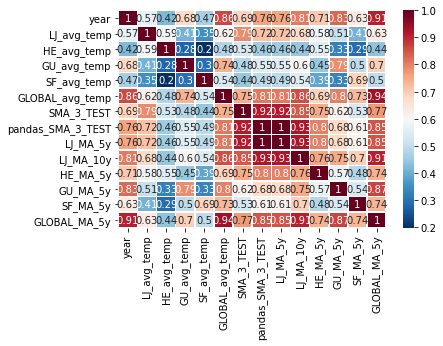

In [96]:
#Seaborn is a python library for visualizing data. 
#It is built on top of matplotlib and closely integrated with pandas data structures.
# Plotting correlation coeficient heat map for entire data set - easy to see data that is correlated.
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## Additional Visuals - Comparison: Original Data | 5-y MA | 10-y MA

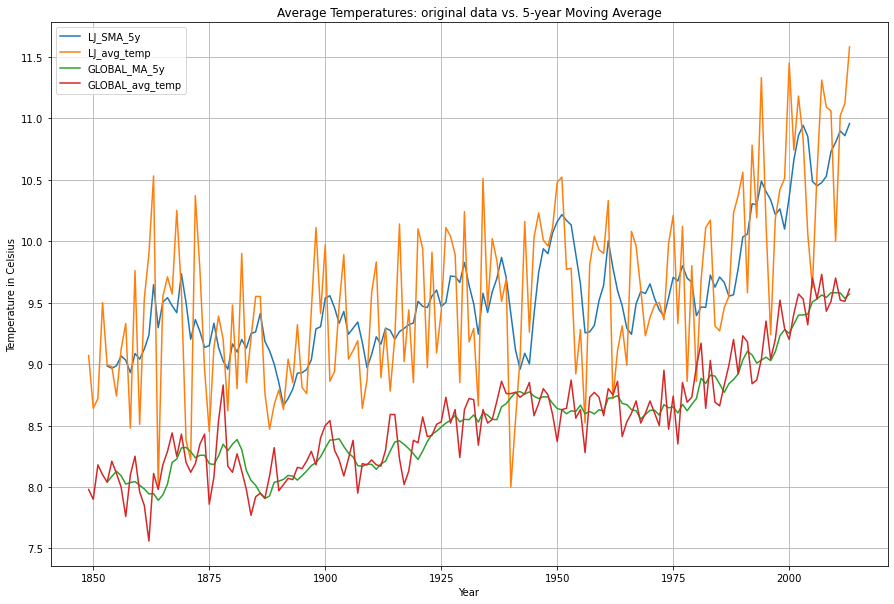

In [86]:
# Plot the averages - Ljubljana and Global: original and 5-year MA
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['year'], df['LJ_MA_5y'],label='LJ_SMA_5y')
plt.plot(df['year'], df['LJ_avg_temp'],label='LJ_avg_temp')
plt.plot(df['year'], df['GLOBAL_MA_5y'],label='GLOBAL_MA_5y')
plt.plot(df['year'], df['GLOBAL_avg_temp'],label='GLOBAL_avg_temp')
plt.legend(loc=2)

# Create labels for the x and y axes.
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

# Create a title.
plt.title("Average Temperatures: original data vs. 5-year Moving Average")

# Show the plot
plt.show()

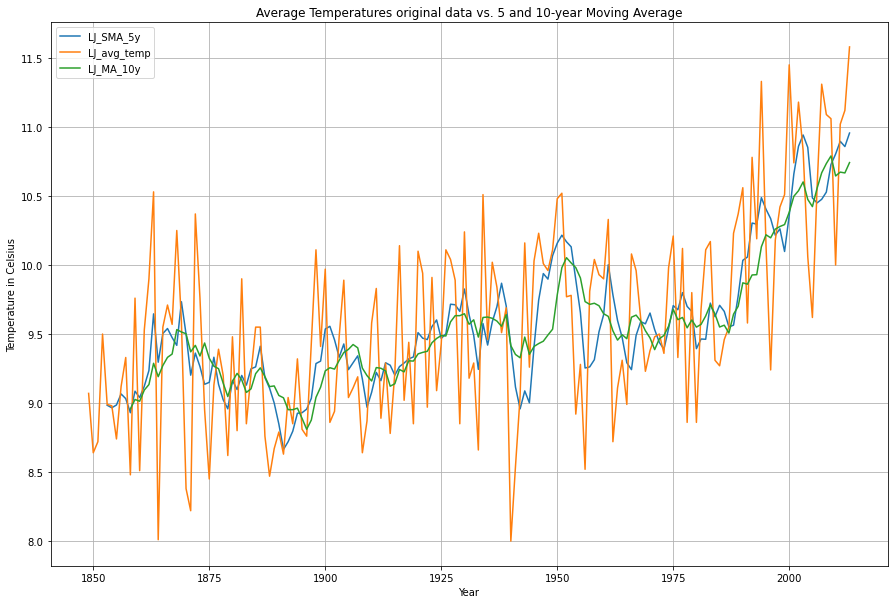

In [85]:
# Plot the averages - Ljubljana original data, 5-year and 10-year Moving Average
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['year'], df['LJ_MA_5y'],label='LJ_SMA_5y')
plt.plot(df['year'], df['LJ_avg_temp'],label='LJ_avg_temp')
plt.plot(df['year'], df['LJ_MA_10y'],label='LJ_MA_10y')
plt.legend(loc=2)

# Create labels for the x and y axes.
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

# Create a title.
plt.title("Average Temperatures: original data vs. 5 and 10-year Moving Average")

# Show the plot
plt.show()